In [1]:
!pip install Boruta

In [5]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Column names for the dataset
column_names = [
    "ID", "Diagnosis",
    "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness",
    "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry",
    "Mean Fractal Dimension", "SE Radius", "SE Texture", "SE Perimeter", "SE Area",
    "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points", "SE Symmetry",
    "SE Fractal Dimension", "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area",
    "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave Points",
    "Worst Symmetry", "Worst Fractal Dimension"
]

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
df.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
print(df.describe().T)  #Values need to be normalized before fitting. 
print(df.isnull().sum())

                         count          mean           std          min  \
ID                       569.0  3.037183e+07  1.250206e+08  8670.000000   
Mean Radius              569.0  1.412729e+01  3.524049e+00     6.981000   
Mean Texture             569.0  1.928965e+01  4.301036e+00     9.710000   
Mean Perimeter           569.0  9.196903e+01  2.429898e+01    43.790000   
Mean Area                569.0  6.548891e+02  3.519141e+02   143.500000   
Mean Smoothness          569.0  9.636028e-02  1.406413e-02     0.052630   
Mean Compactness         569.0  1.043410e-01  5.281276e-02     0.019380   
Mean Concavity           569.0  8.879932e-02  7.971981e-02     0.000000   
Mean Concave Points      569.0  4.891915e-02  3.880284e-02     0.000000   
Mean Symmetry            569.0  1.811619e-01  2.741428e-02     0.106000   
Mean Fractal Dimension   569.0  6.279761e-02  7.060363e-03     0.049960   
SE Radius                569.0  4.051721e-01  2.773127e-01     0.111500   
SE Texture               

In [10]:
df = df.rename(columns={'Diagnosis':'Label'})
print(df.dtypes)

ID                           int64
Label                       object
Mean Radius                float64
Mean Texture               float64
Mean Perimeter             float64
Mean Area                  float64
Mean Smoothness            float64
Mean Compactness           float64
Mean Concavity             float64
Mean Concave Points        float64
Mean Symmetry              float64
Mean Fractal Dimension     float64
SE Radius                  float64
SE Texture                 float64
SE Perimeter               float64
SE Area                    float64
SE Smoothness              float64
SE Compactness             float64
SE Concavity               float64
SE Concave Points          float64
SE Symmetry                float64
SE Fractal Dimension       float64
Worst Radius               float64
Worst Texture              float64
Worst Perimeter            float64
Worst Area                 float64
Worst Smoothness           float64
Worst Compactness          float64
Worst Concavity     

## Understand the data 

<Axes: xlabel='Label', ylabel='count'>

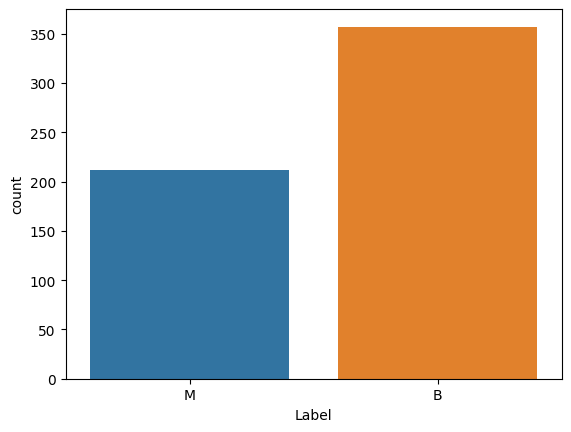

In [11]:
sns.countplot(x="Label", data=df) #M - malignant   B - benign

## Replace categorical values with numbers

In [13]:
df['Label'].value_counts()

Label
B    357
M    212
Name: count, dtype: int64